In [1]:
import pandas as pd

In [2]:
path = 'C:\\Users\\sibel\\Downloads\\archive\\'

In [3]:
df = pd.read_csv(path + 'train_1.csv', sep=',')
df.head()

id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0

0    1434
2     808
1     300
4     234
3     154
Name: diagnosis, dtype: int64

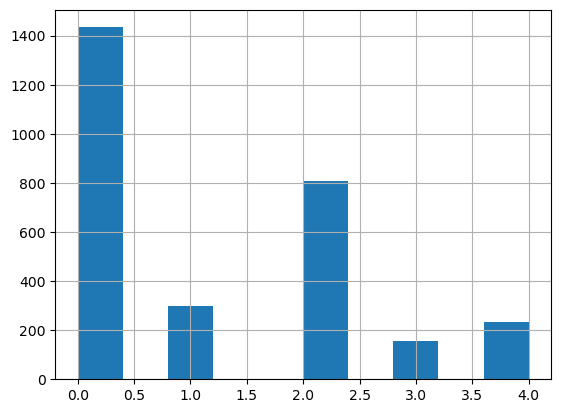

In [4]:
# verilen tanı durumlarını inceleelim
df['diagnosis'].hist()
df['diagnosis'].value_counts()

In [5]:
import os 
files = os.listdir(path + 'train_images\\train_images')
files # dosya adları döner

['1ae8c165fd53.png',
 '1b329a127307.png',
 '1b32e1d775ea.png',
 '1b3647865779.png',
 '1b398c0494d1.png',
 '1b4625877527.png',
 '1b495ac025b7.png',
 '1b862fb6f65d.png',
 '1b8701231c8f.png',
 '1b8ad0afe9fb.png',
 '1bb0ddfe753a.png',
 '1bea04b2bb2d.png',
 '1bf30c84bbad.png',
 '1c0cf251b426.png',
 '1c0e5dd1b14c.png',
 '1c13a1483f4a.png',
 '1c3a6b4449e9.png',
 '1c47815f4a6b.png',
 '1c4d87baaffc.png',
 '1c4f3aa4df06.png',
 '1c578b72d7b3.png',
 '1c5ad36fb799.png',
 '1c5e6cdc7ee1.png',
 '1c6d119c3d70.png',
 '1c7a013eeba7.png',
 '1c9521878baf.png',
 '1c9c583c10bf.png',
 '1ca35d483772.png',
 '1ca62b3e4fd3.png',
 '1ca91751be4d.png',
 '1caba2fb38f6.png',
 '1cb6961d141c.png',
 '1cb814ed6332.png',
 '1cc58b15f466.png',
 '1d0b93317aa8.png',
 '1d11794057ff.png',
 '1d14dd912671.png',
 '1d2472849dce.png',
 '1d29cb2f4296.png',
 '1d37f1c8b6d8.png',
 '1d3e9b939732.png',
 '1d46f1326394.png',
 '1d55e689cf84.png',
 '1d674e2e32e0.png',
 '1d74c4713e21.png',
 '1da25637859b.png',
 '1da4a17c18c9.png',
 '1db0393cdbc

In [6]:
import cv2 

image_list = []

for i in files[0:50]:
    image = cv2.imread(path + 'train_images\\train_images\\' + i)
    image = cv2.resize(image, (400,400))
    # cv2 görüntüyü BGR çevirir. Ama görüntünün orjinali RGB dir. 
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_list.append(image)

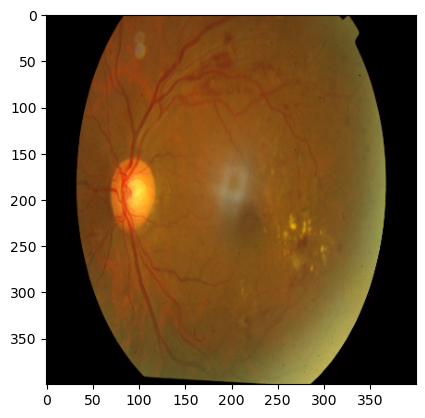

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image_list[5])

###### Threshold, sağlanan eşik değerlerine göre piksel değerlerinin atanması olan openCV de bir tekniktir., Threshold'da her piksel değeri eşikten küçükse, 0'ra ayarlanır, aksi taktirde maximum değere (genellikle 255) ayarlanır

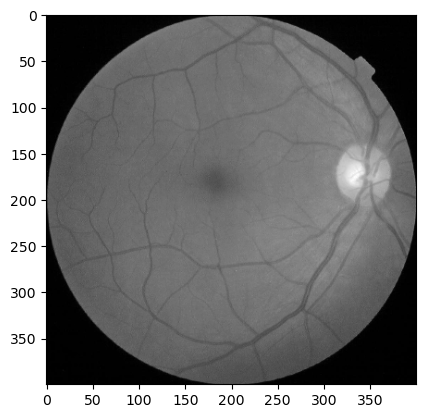

In [8]:
copy = image_list[4].copy()
copy = image = cv2.cvtColor(copy,cv2.COLOR_RGB2GRAY)
plt.imshow(copy,cmap='gray')

In [9]:
copy.shape # siyah beyaza dönüştüğü için tek boyutlu oldu 

(400, 400)

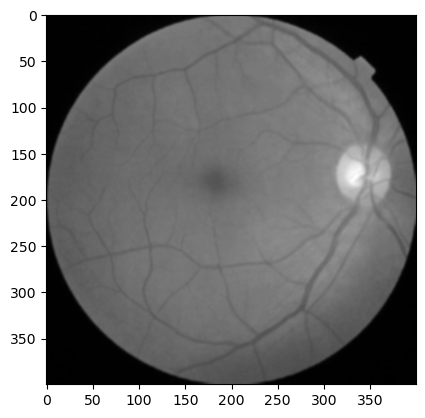

In [10]:
# daha başarılı threshold uygulamak için bulanıklaştırma yapıldı

blur = cv2.GaussianBlur(copy,(5,5),0) # bu işlem ile keskinlik azaltıldı.
plt.imshow(blur, cmap='gray')

In [11]:
thres = cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1] # 10 piksel altı siyaha üstü ise beyaza döndürüldü

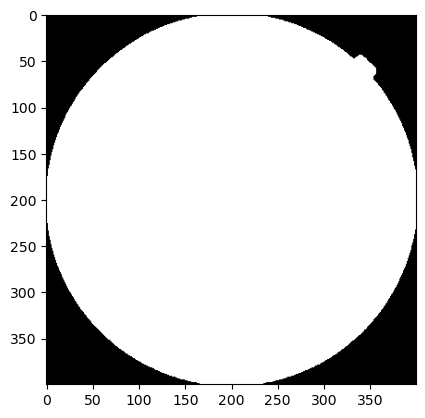

In [12]:
plt.imshow(thres,cmap="gray")

###### Kontur : Görüntüdeki şekillerin sınırlarını belli eden çizgi

In [13]:
contour = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour

((array([[[175,   0]],
  
         [[174,   1]],
  
         [[169,   1]],
  
         ...,
  
         [[232,   1]],
  
         [[228,   1]],
  
         [[227,   0]]], dtype=int32),),
 array([[[-1, -1, -1, -1]]], dtype=int32))

In [14]:
contour = contour[0][0]
contour.shape

(560, 1, 2)

In [15]:
contour = contour[:,0,:]
contour.shape

(560, 2)

In [16]:
contour[:,0].argmax() # x in en yüksek olduğu değeri verir

sag = tuple(contour[contour[:,0].argmax()])
sol = tuple(contour[contour[:,0].argmin()])
alt = tuple(contour[contour[:,1].argmax()])
ust = tuple(contour[contour[:,1].argmin()]) 

sag,sol,alt,ust # kordinatlara eriştik

((399, 232), (0, 181), (166, 399), (175, 0))

In [17]:
x1 = sol[0]
x2 = sag[0]
y1 = ust[1]
y2 = alt[1]

x1,x2,y1,y2

(0, 399, 0, 399)

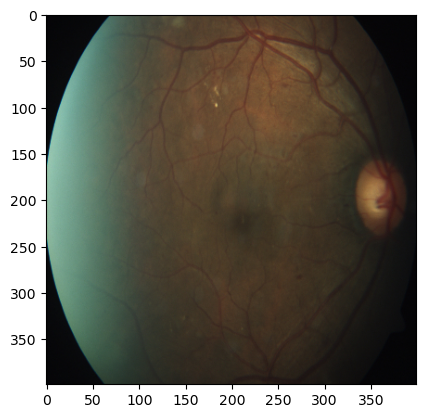

In [18]:
orijinal = image_list[1].copy()
crop_first = orijinal[y1:y2, x1:x2]
plt.imshow(crop_first)

In [19]:
crop_first = cv2.resize(crop_first,(400,400))

In [20]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100

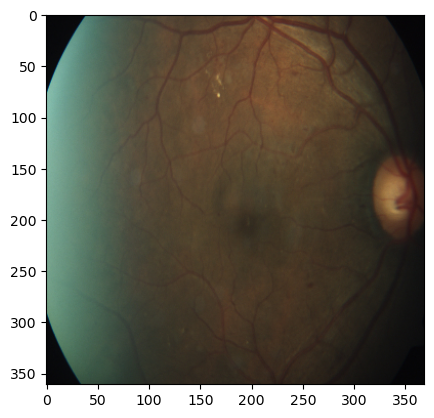

In [21]:
crop_son = orijinal[y1+y:y2-y,x1+x:x2-x]
plt.imshow(crop_son)

In [22]:
crop_son = cv2.resize(crop_son, (400,400))

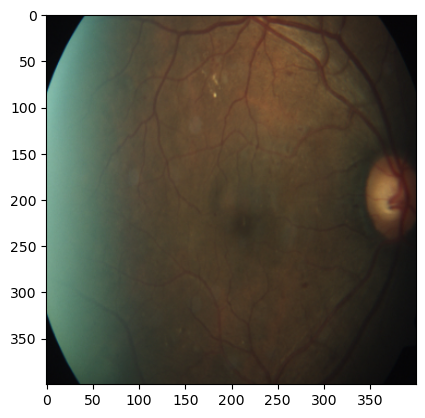

In [23]:
plt.imshow(crop_son)

Histogram Eşitleme : Görüntüde ki kontrastı arttırır. 

###### CLACHE 

In [24]:
lab = cv2.cvtColor(crop_son, cv2.COLOR_RGB2LAB)
lab.shape

(400, 400, 3)

In [25]:
l,a,b = cv2.split(lab)
l,a,b

(array([[6, 6, 6, ..., 5, 5, 3],
        [6, 5, 6, ..., 5, 5, 3],
        [5, 5, 5, ..., 5, 5, 3],
        ...,
        [6, 5, 6, ..., 3, 3, 5],
        [6, 5, 6, ..., 3, 3, 5],
        [6, 5, 5, ..., 5, 3, 3]], dtype=uint8),
 array([[128, 128, 128, ..., 128, 128, 128],
        [128, 130, 128, ..., 128, 128, 128],
        [130, 128, 128, ..., 128, 128, 130],
        ...,
        [128, 128, 128, ..., 128, 130, 128],
        [126, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128]], dtype=uint8),
 array([[127, 126, 126, ..., 128, 129, 126],
        [127, 126, 127, ..., 127, 128, 127],
        [126, 126, 126, ..., 127, 128, 126],
        ...,
        [126, 126, 127, ..., 127, 126, 128],
        [129, 127, 126, ..., 127, 127, 128],
        [127, 128, 127, ..., 128, 127, 127]], dtype=uint8))

In [26]:
l.shape

(400, 400)

In [27]:
flat = l.flatten()
flat.shape

(160000,)

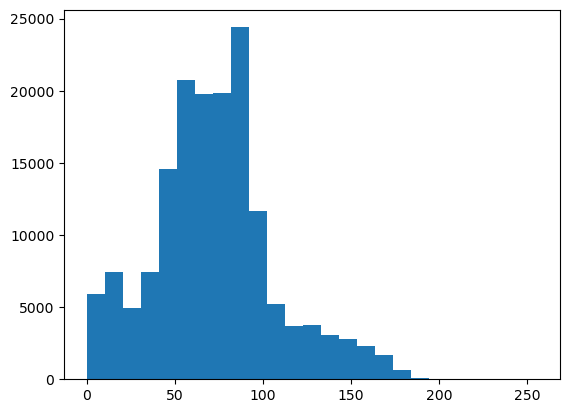

In [28]:
plt.hist(flat,25,[0,256])
plt.show()

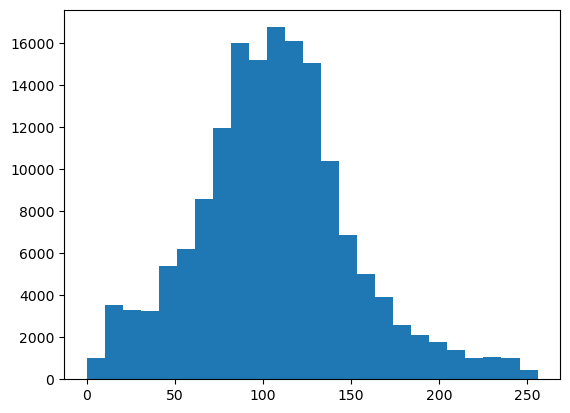

In [29]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(l)

plt.hist(clahe_image.flatten(), 25, [0, 256])
plt.show()

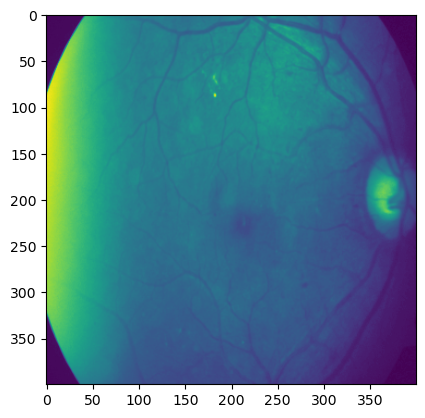

In [30]:
plt.imshow(l) # ilk hali

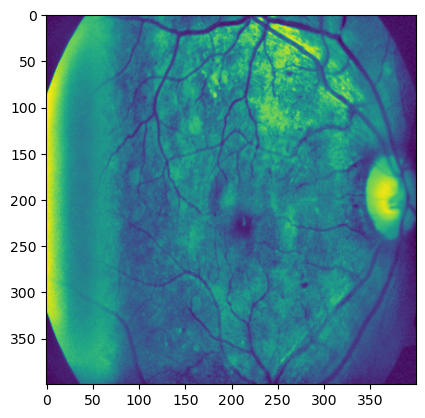

In [31]:
plt.imshow(clahe_image) # son hali

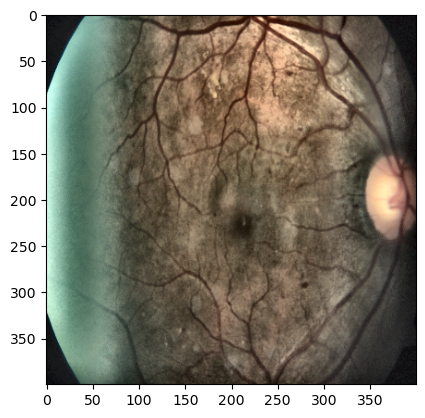

In [32]:
limg = cv2.merge((clahe_image,a,b)) # görüntü, işlendikten sonra tekrar birleştirildi
end = cv2.cvtColor(limg,cv2.COLOR_LAB2RGB)
plt.imshow(end)

Görüntüde hafif kumlanma oldu

###### Bunu düzenlemek için median blur kullanılmalı

In [33]:
mBlur = cv2.medianBlur(end,3) #(end, x) x'in değeri arttıkça görsel bulanıklaşır
mBlurBack = cv2.medianBlur(end,41)

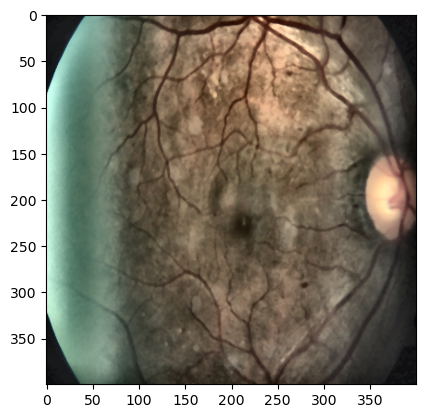

In [34]:
plt.imshow(mBlur)

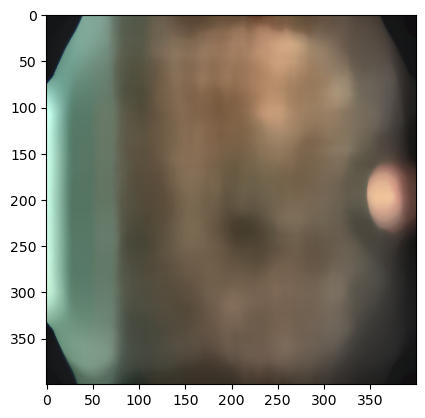

In [35]:
plt.imshow(mBlurBack)

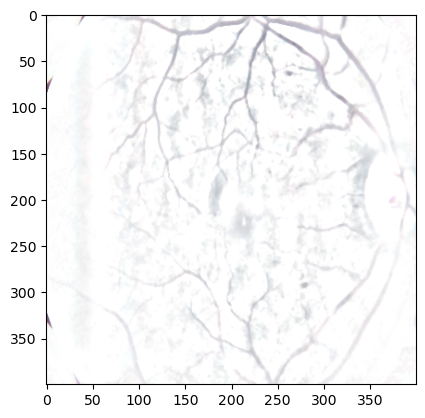

In [36]:
# gözde kanlı olan kısmını bulmak için saydam vebulanıklaşmış hali karıştırıldı

mask = cv2.addWeighted(mBlur,1,mBlurBack,-1,255)
plt.imshow(mask)

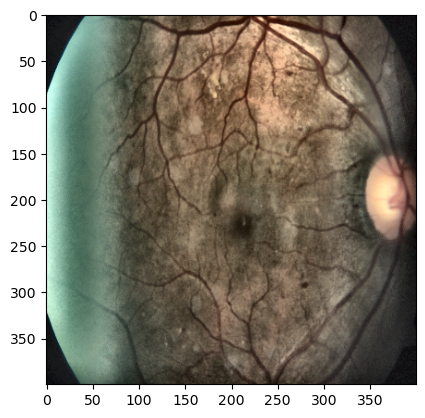

In [37]:
plt.imshow(end)

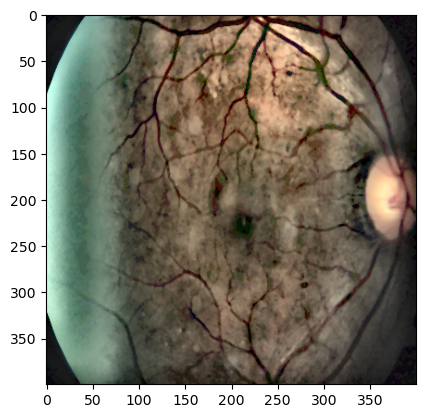

In [38]:
img_end = cv2.bitwise_and(mask,mBlur) # kanlı kısım biraz daha belirgin hale geldi
plt.imshow(img_end)

###### CLAHE, bir görüntünün yerel kontrast özelliklerinin dinamik olarak korunmasına yardımcı olan Histogram Eşitleme'nin uyarlanılabilir bir uzantısıdır. CLAHE 'nin ardından arka plan görüntüsünü yumuşatmak için DR görüntülerinin median filtrelemesi yapılır. Kullanılan algoritmalar, DR görüntülerinin iyileştirilmesinde kayda değer gelişmeler yaratılmıştır.

In [39]:
from tqdm import tqdm_notebook as tqdm #döngünün ilerlemesini görmek için kullanıldı

# detaylı anlatmak için yapılan işlemler tüm görsellere uygulandı

image_list = []

for i in tqdm(files):
    image = cv2.imread(path + 'train_images\\train_images\\' + i)
    image = cv2.resize(image, (400,400))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    copy = image.copy()
    copy = cv2.cvtColor(copy,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(copy,(5,5),0)
    thres = cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1]
    contour = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contour = contour[0][0]
    contour = contour[:,0,:]
    sag = tuple(contour[contour[:,0].argmax()])
    sol = tuple(contour[contour[:,0].argmin()])
    alt = tuple(contour[contour[:,1].argmax()])
    ust = tuple(contour[contour[:,1].argmin()]) 
    x1 = sol[0]
    x2 = sag[0]
    y1 = ust[1]
    y2 = alt[1]
    x = int(x2-x1)*4//50
    y = int(y2-y1)*5//50
    copy2 = image.copy()
    # bazı kırpılmış görüntüleri kaybetmemek için bir eşik değeri belirlendi
    if x2-x1>100 and y2-y1>100:
        copy2 = copy2[y1+y:y2-y, x1+x:x2-x]
        copy2 = cv2.resize(copy2, (400,400))
    lab = cv2.cvtColor(copy2, cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(l)
    limg = cv2.merge((clahe_image,a,b))
    end = cv2.cvtColor(limg,cv2.COLOR_LAB2RGB)
    mBlur = cv2.medianBlur(end,3) 
    mBlurBack = cv2.medianBlur(end,41)
    mask = cv2.addWeighted(mBlur,1,mBlurBack,-1,255)
    img_end = cv2.bitwise_and(mask,mBlur) 
    image_list.append(img_end)

C:\Users\sibel\AppData\Local\Temp\ipykernel_9008\3038048178.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(files):


  0%|          | 0/2930 [00:00<?, ?it/s]

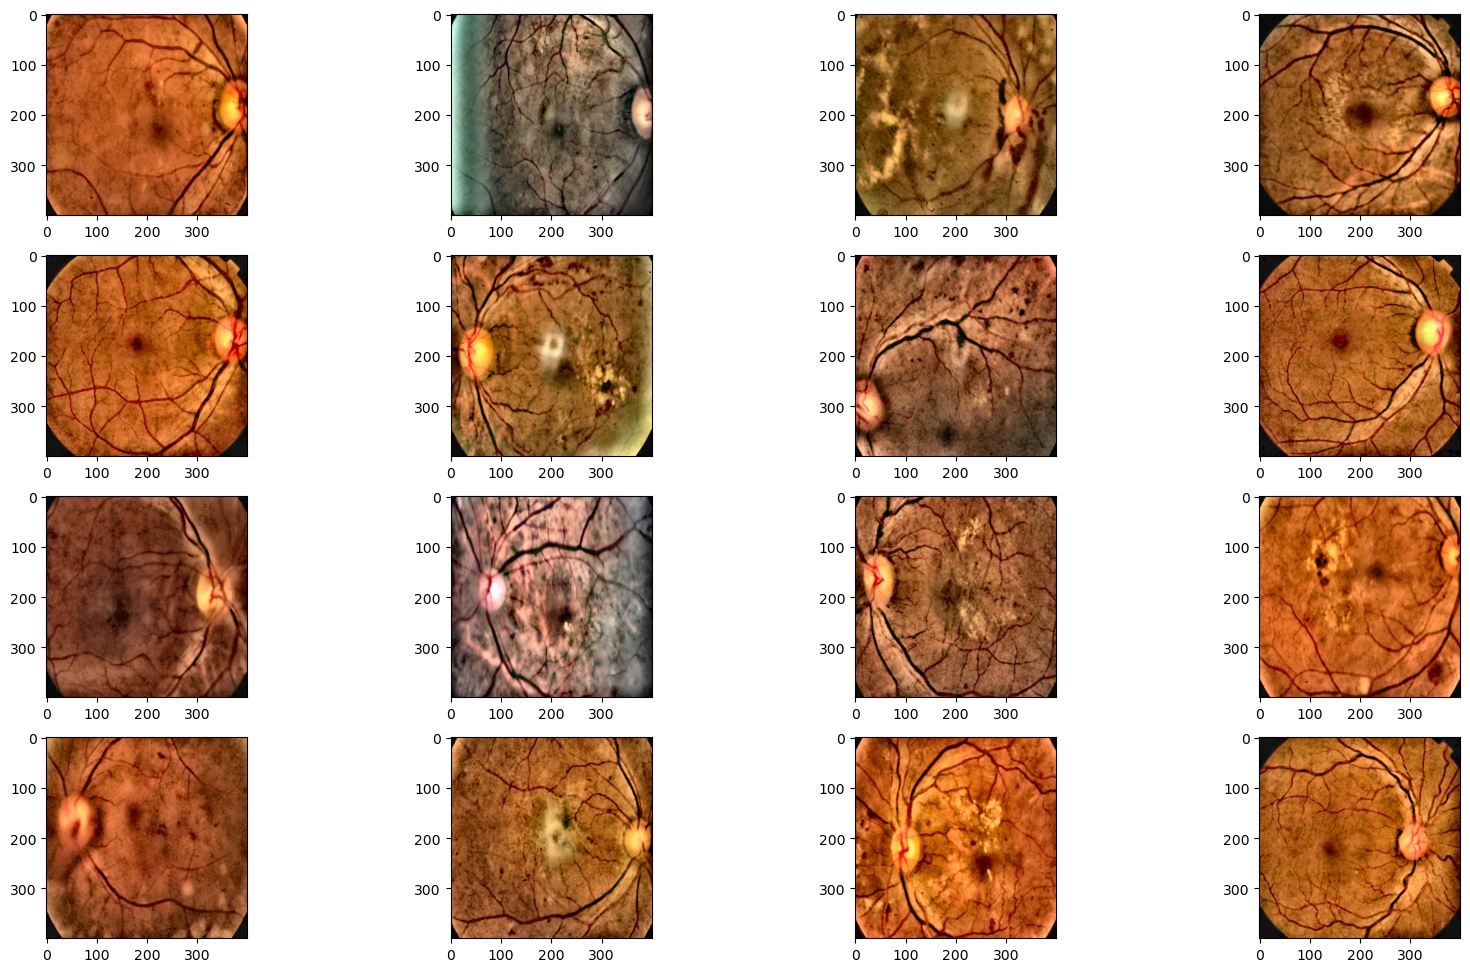

In [40]:
fig = plt.figure(figsize=(20,12)) # görüntüleri yan yana ayarlamak için kullanıldı

for i in range(16):
    img = image_list[i]
    fig.add_subplot(4,4,i+1)
    plt.imshow(img)

In [41]:
# veriler 0 ve 1 olarak etiklendi
y_train = pd.get_dummies(df['diagnosis']).values

In [42]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [43]:
import numpy as np

y_train_end = np.ones(y_train.shape,dtype='uint8')
y_train_end

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [44]:
y_train_end[:, 4] = y_train[:, 4]

In [45]:
import numpy as np

np.logical_or(0,0) # matematik de ki or işlemine karşılık gelen komut

False

In [46]:
for i in range(3,-1,-1):
    y_train_end[:,i] = np.logical_or(y_train[:,i],y_train_end[:, i+1])

y_train_end

array([[1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [47]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [48]:
x_train = np.array(image_list)
x_train.shape

(2930, 400, 400, 3)

In [49]:
y_train_end.shape

(2930, 5)

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train_end,test_size = 0.20, random_state=2019,shuffle=True)

In [51]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
data_generator = datagen.flow(x_train,y_train,batch_size=2) 

Az veriile yüksek performans için transfer learning kullanılabilir.

In [52]:
from efficientnet.keras import EfficientNetB5

In [53]:
model = EfficientNetB5()
model.summary()

123456840/123456840 [==============================] - 352s 3us/step
Model: "efficientnet-b5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 456, 456, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 228, 228, 48)         1296      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 228, 228, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activatio

 block1c_activation (Activa  (None, 228, 228, 24)         0         ['block1c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block1c_se_squeeze (Global  (None, 24)                   0         ['block1c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block1c_se_reshape (Reshap  (None, 1, 1, 24)             0         ['block1c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block1c_se_reduce (Conv2D)  (None, 1, 1, 6)              150       ['block1c_se_reshape[0][0]']  
          

 block2b_se_squeeze (Global  (None, 240)                  0         ['block2b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2b_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block2b_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block2b_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block2b_se_reshape[0][0]']  
                                                                                                  
 block2b_se_expand (Conv2D)  (None, 1, 1, 240)            2640      ['block2b_se_reduce[0][0]']   
                                                                                                  
 block2b_s

 block2d_activation (Activa  (None, 114, 114, 240)        0         ['block2d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block2d_se_squeeze (Global  (None, 240)                  0         ['block2d_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2d_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block2d_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block2d_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block2d_se_reshape[0][0]']  
          

 block3a_bn (BatchNormaliza  (None, 57, 57, 240)          960       ['block3a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3a_activation (Activa  (None, 57, 57, 240)          0         ['block3a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3a_se_squeeze (Global  (None, 240)                  0         ['block3a_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3a_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block3a_se_squeeze[0][0]']  
 e)       

 block3c_activation (Activa  (None, 57, 57, 384)          0         ['block3c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3c_se_squeeze (Global  (None, 384)                  0         ['block3c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3c_se_reshape (Reshap  (None, 1, 1, 384)            0         ['block3c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block3c_se_reduce (Conv2D)  (None, 1, 1, 16)             6160      ['block3c_se_reshape[0][0]']  
          

 block3e_bn (BatchNormaliza  (None, 57, 57, 384)          1536      ['block3e_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3e_activation (Activa  (None, 57, 57, 384)          0         ['block3e_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3e_se_squeeze (Global  (None, 384)                  0         ['block3e_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3e_se_reshape (Reshap  (None, 1, 1, 384)            0         ['block3e_se_squeeze[0][0]']  
 e)       

 block4b_activation (Activa  (None, 29, 29, 768)          0         ['block4b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4b_se_squeeze (Global  (None, 768)                  0         ['block4b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4b_se_reshape (Reshap  (None, 1, 1, 768)            0         ['block4b_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block4b_se_reduce (Conv2D)  (None, 1, 1, 32)             24608     ['block4b_se_reshape[0][0]']  
          

 block4d_bn (BatchNormaliza  (None, 29, 29, 768)          3072      ['block4d_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4d_activation (Activa  (None, 29, 29, 768)          0         ['block4d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4d_se_squeeze (Global  (None, 768)                  0         ['block4d_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4d_se_reshape (Reshap  (None, 1, 1, 768)            0         ['block4d_se_squeeze[0][0]']  
 e)       

 block4f_dwconv (DepthwiseC  (None, 29, 29, 768)          6912      ['block4f_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block4f_bn (BatchNormaliza  (None, 29, 29, 768)          3072      ['block4f_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4f_activation (Activa  (None, 29, 29, 768)          0         ['block4f_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4f_se_squeeze (Global  (None, 768)                  0         ['block4f_activation[0][0]']  
 AveragePo

 block5a_expand_activation   (None, 29, 29, 768)          0         ['block5a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5a_dwconv (DepthwiseC  (None, 29, 29, 768)          19200     ['block5a_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5a_bn (BatchNormaliza  (None, 29, 29, 768)          3072      ['block5a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5a_activation (Activa  (None, 29, 29, 768)          0         ['block5a_bn[0][0]']          
 tion)    

 block5c_dwconv (DepthwiseC  (None, 29, 29, 1056)         26400     ['block5c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5c_bn (BatchNormaliza  (None, 29, 29, 1056)         4224      ['block5c_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5c_activation (Activa  (None, 29, 29, 1056)         0         ['block5c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5c_se_squeeze (Global  (None, 1056)                 0         ['block5c_activation[0][0]']  
 AveragePo

 block5e_expand_activation   (None, 29, 29, 1056)         0         ['block5e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5e_dwconv (DepthwiseC  (None, 29, 29, 1056)         26400     ['block5e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5e_bn (BatchNormaliza  (None, 29, 29, 1056)         4224      ['block5e_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5e_activation (Activa  (None, 29, 29, 1056)         0         ['block5e_bn[0][0]']          
 tion)    

 block5g_expand_bn (BatchNo  (None, 29, 29, 1056)         4224      ['block5g_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5g_expand_activation   (None, 29, 29, 1056)         0         ['block5g_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5g_dwconv (DepthwiseC  (None, 29, 29, 1056)         26400     ['block5g_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5g_bn (BatchNormaliza  (None, 29, 29, 1056)         4224      ['block5g_dwconv[0][0]']      
 tion)    

 block6b_expand_activation   (None, 15, 15, 1824)         0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6b_dwconv (DepthwiseC  (None, 15, 15, 1824)         45600     ['block6b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6b_bn (BatchNormaliza  (None, 15, 15, 1824)         7296      ['block6b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6b_activation (Activa  (None, 15, 15, 1824)         0         ['block6b_bn[0][0]']          
 tion)    

 block6d_expand_bn (BatchNo  (None, 15, 15, 1824)         7296      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 15, 15, 1824)         0         ['block6d_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6d_dwconv (DepthwiseC  (None, 15, 15, 1824)         45600     ['block6d_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6d_bn (BatchNormaliza  (None, 15, 15, 1824)         7296      ['block6d_dwconv[0][0]']      
 tion)    

 block6f_expand_conv (Conv2  (None, 15, 15, 1824)         554496    ['block6e_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6f_expand_bn (BatchNo  (None, 15, 15, 1824)         7296      ['block6f_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6f_expand_activation   (None, 15, 15, 1824)         0         ['block6f_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6f_dwconv (DepthwiseC  (None, 15, 15, 1824)         45600     ['block6f_expand_activation[0]
 onv2D)   

 block6g_add (Add)           (None, 15, 15, 304)          0         ['block6g_drop[0][0]',        
                                                                     'block6f_add[0][0]']         
                                                                                                  
 block6h_expand_conv (Conv2  (None, 15, 15, 1824)         554496    ['block6g_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6h_expand_bn (BatchNo  (None, 15, 15, 1824)         7296      ['block6h_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6h_expand_activation   (None, 15, 15, 1824)         0         ['block6h_expand_bn[0][0]']   
 (Activati

 block6i_drop (FixedDropout  (None, 15, 15, 304)          0         ['block6i_project_bn[0][0]']  
 )                                                                                                
                                                                                                  
 block6i_add (Add)           (None, 15, 15, 304)          0         ['block6i_drop[0][0]',        
                                                                     'block6h_add[0][0]']         
                                                                                                  
 block7a_expand_conv (Conv2  (None, 15, 15, 1824)         554496    ['block6i_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block7a_expand_bn (BatchNo  (None, 15, 15, 1824)         7296      ['block7a_expand_conv[0][0]'] 
 rmalizati

 block7b_add (Add)           (None, 15, 15, 512)          0         ['block7b_drop[0][0]',        
                                                                     'block7a_project_bn[0][0]']  
                                                                                                  
 block7c_expand_conv (Conv2  (None, 15, 15, 3072)         1572864   ['block7b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block7c_expand_bn (BatchNo  (None, 15, 15, 3072)         12288     ['block7c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7c_expand_activation   (None, 15, 15, 3072)         0         ['block7c_expand_bn[0][0]']   
 (Activati

In [54]:
model = EfficientNetB5(weights = 'imagenet', include_top = False, input_shape =(400,400,3))
model.summary()

115515256/115515256 [==============================] - 309s 3us/step
Model: "efficientnet-b5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 400, 400, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 200, 200, 48)         1296      ['input_2[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 200, 200, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activatio

 block1c_activation (Activa  (None, 200, 200, 24)         0         ['block1c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block1c_se_squeeze (Global  (None, 24)                   0         ['block1c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block1c_se_reshape (Reshap  (None, 1, 1, 24)             0         ['block1c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block1c_se_reduce (Conv2D)  (None, 1, 1, 6)              150       ['block1c_se_reshape[0][0]']  
          

 block2b_se_squeeze (Global  (None, 240)                  0         ['block2b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2b_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block2b_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block2b_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block2b_se_reshape[0][0]']  
                                                                                                  
 block2b_se_expand (Conv2D)  (None, 1, 1, 240)            2640      ['block2b_se_reduce[0][0]']   
                                                                                                  
 block2b_s

 block2d_activation (Activa  (None, 100, 100, 240)        0         ['block2d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block2d_se_squeeze (Global  (None, 240)                  0         ['block2d_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2d_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block2d_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block2d_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block2d_se_reshape[0][0]']  
          

 block3a_bn (BatchNormaliza  (None, 50, 50, 240)          960       ['block3a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3a_activation (Activa  (None, 50, 50, 240)          0         ['block3a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3a_se_squeeze (Global  (None, 240)                  0         ['block3a_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3a_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block3a_se_squeeze[0][0]']  
 e)       

 block3c_activation (Activa  (None, 50, 50, 384)          0         ['block3c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3c_se_squeeze (Global  (None, 384)                  0         ['block3c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3c_se_reshape (Reshap  (None, 1, 1, 384)            0         ['block3c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block3c_se_reduce (Conv2D)  (None, 1, 1, 16)             6160      ['block3c_se_reshape[0][0]']  
          

 block3e_bn (BatchNormaliza  (None, 50, 50, 384)          1536      ['block3e_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3e_activation (Activa  (None, 50, 50, 384)          0         ['block3e_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3e_se_squeeze (Global  (None, 384)                  0         ['block3e_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3e_se_reshape (Reshap  (None, 1, 1, 384)            0         ['block3e_se_squeeze[0][0]']  
 e)       

 block4b_activation (Activa  (None, 25, 25, 768)          0         ['block4b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4b_se_squeeze (Global  (None, 768)                  0         ['block4b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4b_se_reshape (Reshap  (None, 1, 1, 768)            0         ['block4b_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block4b_se_reduce (Conv2D)  (None, 1, 1, 32)             24608     ['block4b_se_reshape[0][0]']  
          

 block4d_bn (BatchNormaliza  (None, 25, 25, 768)          3072      ['block4d_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4d_activation (Activa  (None, 25, 25, 768)          0         ['block4d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4d_se_squeeze (Global  (None, 768)                  0         ['block4d_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4d_se_reshape (Reshap  (None, 1, 1, 768)            0         ['block4d_se_squeeze[0][0]']  
 e)       

 block4f_dwconv (DepthwiseC  (None, 25, 25, 768)          6912      ['block4f_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block4f_bn (BatchNormaliza  (None, 25, 25, 768)          3072      ['block4f_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4f_activation (Activa  (None, 25, 25, 768)          0         ['block4f_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4f_se_squeeze (Global  (None, 768)                  0         ['block4f_activation[0][0]']  
 AveragePo

 block5a_expand_activation   (None, 25, 25, 768)          0         ['block5a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5a_dwconv (DepthwiseC  (None, 25, 25, 768)          19200     ['block5a_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5a_bn (BatchNormaliza  (None, 25, 25, 768)          3072      ['block5a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5a_activation (Activa  (None, 25, 25, 768)          0         ['block5a_bn[0][0]']          
 tion)    

 block5c_dwconv (DepthwiseC  (None, 25, 25, 1056)         26400     ['block5c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5c_bn (BatchNormaliza  (None, 25, 25, 1056)         4224      ['block5c_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5c_activation (Activa  (None, 25, 25, 1056)         0         ['block5c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5c_se_squeeze (Global  (None, 1056)                 0         ['block5c_activation[0][0]']  
 AveragePo

 block5e_expand_activation   (None, 25, 25, 1056)         0         ['block5e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5e_dwconv (DepthwiseC  (None, 25, 25, 1056)         26400     ['block5e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5e_bn (BatchNormaliza  (None, 25, 25, 1056)         4224      ['block5e_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5e_activation (Activa  (None, 25, 25, 1056)         0         ['block5e_bn[0][0]']          
 tion)    

 block5g_expand_bn (BatchNo  (None, 25, 25, 1056)         4224      ['block5g_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5g_expand_activation   (None, 25, 25, 1056)         0         ['block5g_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5g_dwconv (DepthwiseC  (None, 25, 25, 1056)         26400     ['block5g_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5g_bn (BatchNormaliza  (None, 25, 25, 1056)         4224      ['block5g_dwconv[0][0]']      
 tion)    

 block6b_expand_activation   (None, 13, 13, 1824)         0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6b_dwconv (DepthwiseC  (None, 13, 13, 1824)         45600     ['block6b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6b_bn (BatchNormaliza  (None, 13, 13, 1824)         7296      ['block6b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6b_activation (Activa  (None, 13, 13, 1824)         0         ['block6b_bn[0][0]']          
 tion)    

 block6d_expand_bn (BatchNo  (None, 13, 13, 1824)         7296      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 13, 13, 1824)         0         ['block6d_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6d_dwconv (DepthwiseC  (None, 13, 13, 1824)         45600     ['block6d_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6d_bn (BatchNormaliza  (None, 13, 13, 1824)         7296      ['block6d_dwconv[0][0]']      
 tion)    

 block6f_expand_conv (Conv2  (None, 13, 13, 1824)         554496    ['block6e_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6f_expand_bn (BatchNo  (None, 13, 13, 1824)         7296      ['block6f_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6f_expand_activation   (None, 13, 13, 1824)         0         ['block6f_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6f_dwconv (DepthwiseC  (None, 13, 13, 1824)         45600     ['block6f_expand_activation[0]
 onv2D)   

 block6g_add (Add)           (None, 13, 13, 304)          0         ['block6g_drop[0][0]',        
                                                                     'block6f_add[0][0]']         
                                                                                                  
 block6h_expand_conv (Conv2  (None, 13, 13, 1824)         554496    ['block6g_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6h_expand_bn (BatchNo  (None, 13, 13, 1824)         7296      ['block6h_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6h_expand_activation   (None, 13, 13, 1824)         0         ['block6h_expand_bn[0][0]']   
 (Activati

 block6i_drop (FixedDropout  (None, 13, 13, 304)          0         ['block6i_project_bn[0][0]']  
 )                                                                                                
                                                                                                  
 block6i_add (Add)           (None, 13, 13, 304)          0         ['block6i_drop[0][0]',        
                                                                     'block6h_add[0][0]']         
                                                                                                  
 block7a_expand_conv (Conv2  (None, 13, 13, 1824)         554496    ['block6i_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block7a_expand_bn (BatchNo  (None, 13, 13, 1824)         7296      ['block7a_expand_conv[0][0]'] 
 rmalizati

 block7b_add (Add)           (None, 13, 13, 512)          0         ['block7b_drop[0][0]',        
                                                                     'block7a_project_bn[0][0]']  
                                                                                                  
 block7c_expand_conv (Conv2  (None, 13, 13, 3072)         1572864   ['block7b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block7c_expand_bn (BatchNo  (None, 13, 13, 3072)         12288     ['block7c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7c_expand_activation   (None, 13, 13, 3072)         0         ['block7c_expand_bn[0][0]']   
 (Activati

- include_top = False çıktı katmanını eklemez ve çıktı olarak belirlenen 500 etiketten birini aramaz. Böylelikle biz istediğimiz çıktı değerlerini ekleyebiliriz.
- ImageNet'in ağırlıkları kullanıldı.

In [60]:
from keras.models import Sequential
from keras import layers

modela = Sequential() #katmanların sıralı olmasını sağlar
modela.add(model)
modela.add(layers.GlobalAveragePooling2D()) # kendi çıktı katmanını eklendi
modela.add(layers.Dropout(0.5))
modela.add(layers.Dense(5,activation='sigmoid')) # 0,4 arası 5 çıkış sunuldu.

GlobalAveragePooling2D flatten'e göre kullanım avantajları

 - Parametreleri azaltır
 - Overfittingi minimalize eder
 - Veri Boyutu azlatılır (Veri kaybı olur) 

Flatten veriyi korur

#### Neden sigmoid kullanıldı ?

Normal şartlarda aktivasyon fonksiyonu olarak ikiden fazla sınıf kullanıldığı için softmax kullanılır ama burda durum başka

- Normal çıktı 10000,01000,00100,00010,00001 olsaydı softmax kullanılırdı
- Çıktı 10000,11000,11100,11110,11111 şeklinde olduğu için sigmoid kullanıldı.
- Bir görüntüde birden fazla etiket olduğu için çıktı bu şekildedir
- Multi-label kullanıldı

In [66]:
from keras.optimizers import Adam

modela.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.00005),metrics = ['accuracy'])

In [67]:
from keras.callbacks import ReduceLROnPlateau

# öğrenme aynı değerlerde kaldığı durumu engellemek için kullanıldı
rl = ReduceLROnPlateau(monitor='val_loss',
                      patience = 3,
                      verbose = 1,
                      mode = 'auto',
                      factor = 0.25, # öğrenme katsayısı aynı değerleri erdiğinde bu değerle çarpıp yeni değer alır
                      min_lr=0.000001) 

In [69]:
history = modela.fit_generator(data_generator,
                             steps_per_epoch=1000,# model eğitilirken her tur başına dönecek olan tensorflow gruplarının sayısı
                             epochs=5,# hızlı olsun diye az yazdım. Bu sayıyının büyük olması başarıyı arttırır.
                             validation_data=(x_test,y_test),
                             callbacks=[rl])

C:\Users\sibel\AppData\Local\Temp\ipykernel_9008\201848838.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = modela.fit_generator(data_generator,


Epoch 1/5
1000/1000 [==============================] - 5555s 6s/step - loss: 0.3334 - accuracy: 0.9605 - val_loss: 0.1967 - val_accuracy: 1.0000 - lr: 5.0000e-05
Epoch 2/5
1000/1000 [==============================] - 9106s 9s/step - loss: 0.2075 - accuracy: 0.9515 - val_loss: 0.1596 - val_accuracy: 0.9676 - lr: 5.0000e-05
Epoch 3/5
1000/1000 [==============================] - 5593s 6s/step - loss: 0.1685 - accuracy: 0.9365 - val_loss: 0.1464 - val_accuracy: 0.9846 - lr: 5.0000e-05
Epoch 4/5
1000/1000 [==============================] - 5244s 5s/step - loss: 0.1533 - accuracy: 0.9315 - val_loss: 0.1533 - val_accuracy: 1.0000 - lr: 5.0000e-05
Epoch 5/5
1000/1000 [==============================] - 17348s 17s/step - loss: 0.1384 - accuracy: 0.9070 - val_loss: 0.1419 - val_accuracy: 0.9983 - lr: 5.0000e-05


In [70]:
modela.save("model.h5")

C:\Users\sibel\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
